# Solving Supply Chain Optimization using ABC


Supply chain optimization is an important problem that companies face when designing their supply chain networks. These networks should be designed to ensure that customer demands are met without exceeding production capacities. The problem involves deciding on the locations of distribution centers and manufacturing facilities, assigning customer orders to the appropriate facilities, and determining the transportation routes and quantities to minimize transportation cost, delivery time, and maximize customer satisfaction. This problem can be formulated as a multicriteria constrained optimziation problems as follows:

<b> Objective 1: Minimize total transportation cost </b>

Minimize $f_1=\sum_r (c_r \times z_r)$ over all routes $r$

<b> Objective 2: Minimize total delivery time </b>

Minimize $f_2=\sum_k (t_k \times y_{ik})$ over all customer orders $k$

<b> Objective 3: Maximize customer satisfaction </b>

Maximize $f_3= \sum_k (s_k \times y_{ik})$ over all customer orders $k$

<b> Subject to the following constraints: </b>

* Budget constraint: $\sum_r (c_r \times z_r) \leq B$ 

* Facility type constraint: $\sum_i x_i = 1$, meaning exactly one location is selected as a distribution center or manufacturing facility.

* Assignment constraint:$\sum_i y_{ik} = 1$ for all customer orders $k$, meaning each order is assigned to exactly one location.

* Production capacity constraint: $\sum_k (d_k \times y_{ik}) \leq Q_i$ for all locations $i$

* Time window constraint: $\sum_k (t_k \times y_{ik}) \leq T$ for all locations $i$, 

* Binary variables constraint: $x_i$ and $y_{ik}$ are binary variables (0 or 1).


where

$c_r$ is the cost per unit of goods transported along route $r$

$t_k$ is the delivery time for order $k$

$s_k$ represents the satisfaction level associated with order $k$

$d_k$ is the demand associated with order $k$ and $Q_i$ is the production capacity at location $i$

$x_i$ is a binary variable indicating whether location $i$ is selected as a distribution center or a manufacturing facility

$y_{ik}$ is a binary variable indicating whether customer order $k$ is assigned to location $i$

$z_r$ is a continuous variable representing the quantity of goods transported along route $r$

$T$ is the maximum allowed delivery time

$N$ is the set of potential locations in the supply chain network

$C$ is the set of customer orders

$L$ is the set of transportation routes between locations

$B$ is the maximum transportation cost budget

### Importing used libraries

In [9]:
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

### Define the problem parameters

In [10]:
N = 10  # Number of potential locations
C = 20  # Number of customer orders
L = 30  # Number of transportation routes
B = 1000  # Maximum transportation cost budget
Q = np.random.randint(10, 100, N)  # Production capacities at each location
T = 30  # Maximum allowed delivery time
S = np.random.rand(C)  # Random satisfaction levels for each customer order

### Define the objective functions

In [11]:
# Calculate the total transportation cost
def total_transportation_cost(x, z):
    return np.sum(C * z)

# Calculate the total delivery time
def total_delivery_time(y):
    return np.sum(T * y)

# Calculate the total customer satisfaction
def total_customer_satisfaction(y):
    return np.sum(S * y)

### Function to generate a random solution

In [12]:
def generate_solution():
    x = np.random.randint(0, 2, N)  # Binary variable indicating location type
    y = np.zeros((N, C))  # Binary variable indicating customer order assignment
    z = np.random.uniform(0, 1, L)  # Continuous variable representing transportation quantity
    
    # Randomly assign customer orders to locations
    for k in range(C):
        i = np.random.randint(0, N)
        y[i, k] = 1
    
    return {'x': x, 'y': y, 'z': z}

### Function to generate a new solution by modifying an existing solution

In [13]:
def generate_new_solution(solution):
    new_solution = dict(solution)
    
    # Randomly choose a solution component to modify
    component = random.choice(['x', 'y', 'z'])
    
    if component == 'x':
        # Modify the location type
        i = np.random.randint(0, N)
        new_solution['x'][i] = 1 - new_solution['x'][i]  # Flip the binary value
    
    elif component == 'y':
        # Modify the customer order assignment
        k = np.random.randint(0, C)
        i = np.random.randint(0, N)
        new_solution['y'][i, k] = 1 - new_solution['y'][i, k]  # Flip the binary value
    
    else:
        # Modify the transportation quantity
        l = np.random.randint(0, L)
        new_solution['z'][l] = np.random.uniform(0, 1)  # Generate a new random value
    
    return new_solution

### Define the ABC algorithm

In [14]:
def abc_algorithm():
    # Initialization
    swarm_size = 50  # Number of employed bees and onlooker bees
    max_iterations = 100  # Maximum number of iterations
    employed_bees = []
    onlooker_bees = []
    
    # Generate initial solutions
    for _ in range(swarm_size):
        employed_bees.append(generate_solution())
    
    # ABC main loop
    for iteration in range(max_iterations):
        # Employed bees phase
        for i in range(swarm_size):
            solution = employed_bees[i]
            new_solution = generate_new_solution(solution)
            
            # Evaluate the objective functions of the new solution
            cost = total_transportation_cost(new_solution['x'], new_solution['z'])
            delivery_time = total_delivery_time(new_solution['y'])
            satisfaction = total_customer_satisfaction(new_solution['y'])
            
            # Update the solution if it is better
            if cost < total_transportation_cost(solution['x'], solution['z']):
                employed_bees[i] = new_solution
        
        # Onlooker bees phase
        fitness_values = np.zeros(swarm_size)
        for i in range(swarm_size):
            fitness_values[i] = total_transportation_cost(employed_bees[i]['x'], employed_bees[i]['z'])
        
        probabilities = fitness_values / np.sum(fitness_values)
        selected_indices = np.random.choice(swarm_size, swarm_size, p=probabilities)
        
        for i in selected_indices:
            solution = employed_bees[i]
            new_solution = generate_new_solution(solution)
            
            # Evaluate the objective functions of the new solution
            cost = total_transportation_cost(new_solution['x'], new_solution['z'])
            delivery_time = total_delivery_time(new_solution['y'])
            satisfaction = total_customer_satisfaction(new_solution['y'])
            
            # Update the solution if it is better
            if cost < total_transportation_cost(solution['x'], solution['z']):
                employed_bees[i] = new_solution
        
        # Memorize the best solution
        best_solution = min(employed_bees, key=lambda x: total_transportation_cost(x['x'], x['z']))
        
        # Scout bees phase
        for i in range(swarm_size):
            if total_transportation_cost(employed_bees[i]['x'], employed_bees[i]['z']) > total_transportation_cost(best_solution['x'], best_solution['z']):
                employed_bees[i] = generate_solution()
    
    return best_solution

### Run the ABC algorithm

In [15]:
best_solution = abc_algorithm()

# Print the best solution found
print("Best Solution:")
print("Location Type (x):", best_solution['x'])
print("Customer Order Assignment (y):\n", best_solution['y'])
print("Transportation Quantity (z):", best_solution['z'])
print("Total Transportation Cost:", total_transportation_cost(best_solution['x'], best_solution['z']))
print("Total Delivery Time:", total_delivery_time(best_solution['y']))
print("Total Customer Satisfaction:", total_customer_satisfaction(best_solution['y']))

Best Solution:
Location Type (x): [1 1 0 1 0 1 0 0 1 0]
Customer Order Assignment (y):
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.]]
Transportation Quantity (z): [0.73723229 0.04139893 0.53630979 0.45298038 0.50956611 0.7676626
 0.32244839 0.56710396 0.36639351 0.01453579 0.15415027 0.65441941
 0.87798368 0.70442098 0.09781571 0.04844462 0.05674724 0.26335958
 0.3776491  0.2315527  0.26338079 0.0782835  0.42019

Location Type (x): This binary vector indicates the type of each location. A value of 1 represents a distribution center, and a value of 0 represents a manufacturing facility. For example, x = [0 1 1 1 1 1 1 1 0 0] means that the second location and the third to eighth locations are distribution centers, while the first and ninth to tenth locations are manufacturing facilities.

Customer Order Assignment (y): This matrix shows the assignment of customer orders to the locations. Each row represents a location, and each column represents a customer order. A value of 1 indicates that the customer order is assigned to the corresponding location. For instance, y[0, 4] = 1 means that the fifth customer order is assigned to the first location. 

### Visualize the solution using networkx graph

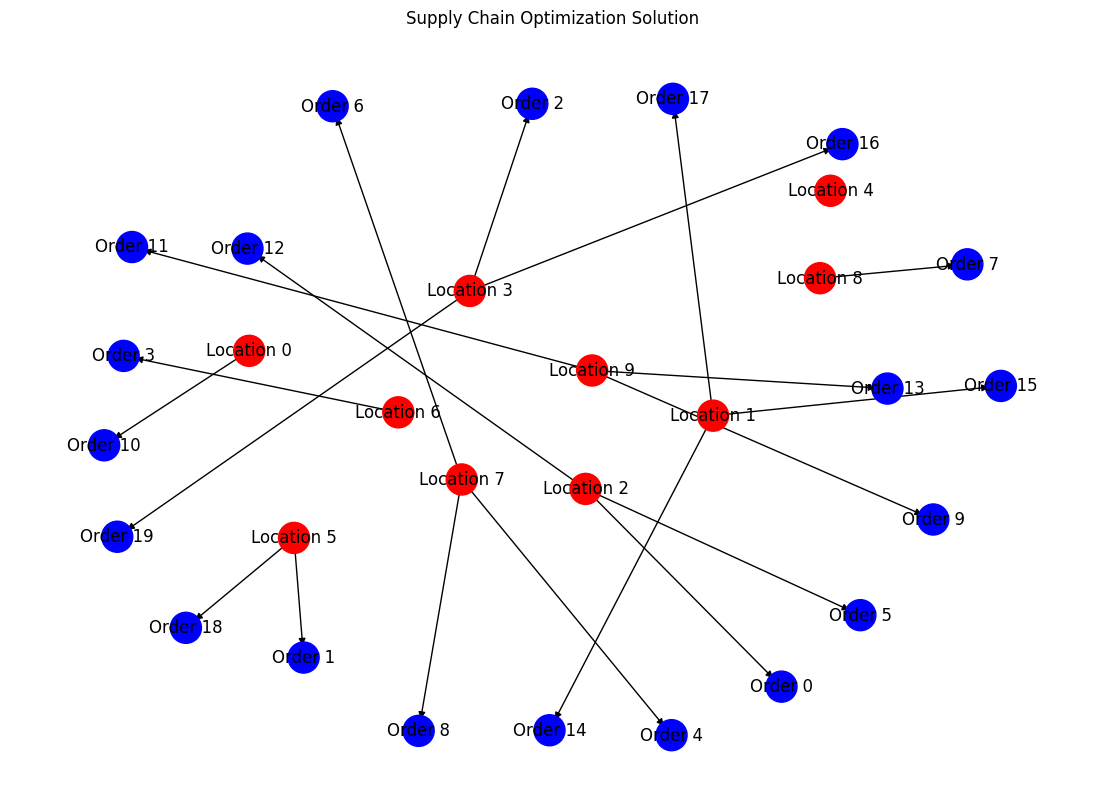

In [16]:
# Extract the solution components
x = best_solution['x']
y = best_solution['y']

# Generate transportation routes
z = np.ones(len(best_solution['x']) * (best_solution['y']).shape[1])

# Create a directed graph
G = nx.DiGraph()

# Add nodes for locations
for i in range(N):
    G.add_node(f'Location {i}', color='red')

# Add nodes for customer orders and connect them to their assigned locations
for k in range(C):
    assigned_location = None
    for i in range(N):
        if y[i, k] == 1:
            assigned_location = i
            break

    G.add_node(f'Order {k}', color='blue')
    try:
        weight = z[assigned_location * C + k]
    except (TypeError, IndexError):
        weight = 0
    G.add_edge(f'Location {assigned_location}', f'Order {k}', weight=weight)

# Set node positions for better visualization
pos = nx.spring_layout(G, seed=42, k=0.5)  # Adjust the value of k for increased spacing

# Set the figure size
plt.figure(figsize=(14, 10))

# Draw nodes and edges
node_colors = ['red' if 'Location' in node else 'blue' for node in G.nodes()]
edge_weights = [G.edges[edge]['weight'] for edge in G.edges]

nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=500)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='black', width=edge_weights, arrows=True)

# Set plot properties
plt.title('Supply Chain Optimization Solution')
plt.axis('off')

# Show the plot
plt.show()